In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from scipy.stats import chi2_contingency
from sklearn.preprocessing import MinMaxScaler

df2 = pd.read_csv("C:/Users/USER/Downloads/new_data_file.csv")

In [2]:
df2.head()

,lgas,year,general facility attendance,general outpatient attendance,antenatal attendance total,deliveries-assisted,caesarean section,deliveries complications,deliveries normal,preterm deliveries,...,registered tb patients screened for hiv,tb patients with hiv receiving art,buruli ulcer patients notified,confirmed dr-tb patients enrolled for treatment,dr-tb suspects tested for dr-tb,suspects screened for tb,tb case successfully treated,tb cases (call forms) notifed,leprosy cases registered,outcome
0,Abua Odual,2013,21936.0,4869.0,1626.0,6.0,19.0,2.0,63.0,1.0,...,2.0,1.0,0.0,7.0,10.0,9.0,1.0,1.0,0.0,0
1,Abua Odual,2014,21936.0,4869.0,1626.0,6.0,19.0,2.0,63.0,1.0,...,17.0,4.0,0.0,3.0,10.0,63.0,8.0,29.0,0.0,0
2,Abua Odual,2015,21936.0,4869.0,1626.0,6.0,19.0,2.0,63.0,1.0,...,4.0,2.0,0.0,2.0,10.0,13.0,15.0,3.0,0.0,0
3,Abua Odual,2016,21936.0,4869.0,1626.0,6.0,19.0,2.0,63.0,1.0,...,22.0,1.0,0.0,3.0,65.0,101.0,7.0,55.0,0.0,0
4,Abua Odual,2017,217444.0,12124.0,2481.0,6.0,19.0,2.0,63.0,1.0,...,11.0,14.0,0.0,7.0,10.0,56.0,15.0,9.0,0.0,0


In [3]:
df2.shape

(207, 127)

In [4]:
df2.columns

Index(['lgas', 'year', 'general facility attendance',
       'general outpatient attendance', 'antenatal attendance total',
       ' deliveries-assisted', ' caesarean section',
       'deliveries complications', 'deliveries normal', ' preterm deliveries',
       ...
       'registered tb patients screened for hiv',
       'tb patients with hiv  receiving art', 'buruli ulcer patients notified',
       'confirmed dr-tb patients enrolled for treatment',
       'dr-tb suspects tested for dr-tb', 'suspects screened for tb',
       'tb case successfully treated', 'tb cases (call forms) notifed',
       'leprosy cases registered', 'outcome'],
      dtype='object', length=127)

In [5]:
df2.head()

,lgas,year,general facility attendance,general outpatient attendance,antenatal attendance total,deliveries-assisted,caesarean section,deliveries complications,deliveries normal,preterm deliveries,...,registered tb patients screened for hiv,tb patients with hiv receiving art,buruli ulcer patients notified,confirmed dr-tb patients enrolled for treatment,dr-tb suspects tested for dr-tb,suspects screened for tb,tb case successfully treated,tb cases (call forms) notifed,leprosy cases registered,outcome
0,Abua Odual,2013,21936.0,4869.0,1626.0,6.0,19.0,2.0,63.0,1.0,...,2.0,1.0,0.0,7.0,10.0,9.0,1.0,1.0,0.0,0
1,Abua Odual,2014,21936.0,4869.0,1626.0,6.0,19.0,2.0,63.0,1.0,...,17.0,4.0,0.0,3.0,10.0,63.0,8.0,29.0,0.0,0
2,Abua Odual,2015,21936.0,4869.0,1626.0,6.0,19.0,2.0,63.0,1.0,...,4.0,2.0,0.0,2.0,10.0,13.0,15.0,3.0,0.0,0
3,Abua Odual,2016,21936.0,4869.0,1626.0,6.0,19.0,2.0,63.0,1.0,...,22.0,1.0,0.0,3.0,65.0,101.0,7.0,55.0,0.0,0
4,Abua Odual,2017,217444.0,12124.0,2481.0,6.0,19.0,2.0,63.0,1.0,...,11.0,14.0,0.0,7.0,10.0,56.0,15.0,9.0,0.0,0


In [6]:
df3 = df2.sample(frac = 1)

In [7]:
df3.head()

,lgas,year,general facility attendance,general outpatient attendance,antenatal attendance total,deliveries-assisted,caesarean section,deliveries complications,deliveries normal,preterm deliveries,...,registered tb patients screened for hiv,tb patients with hiv receiving art,buruli ulcer patients notified,confirmed dr-tb patients enrolled for treatment,dr-tb suspects tested for dr-tb,suspects screened for tb,tb case successfully treated,tb cases (call forms) notifed,leprosy cases registered,outcome
94,Etche,2017,114760.0,24053.0,4773.0,6.0,19.0,2.0,63.0,1.0,...,146.0,11.0,4.0,15.0,37.0,287.0,32.0,119.0,0.0,0
6,Abua Odual,2019,21936.0,4869.0,1626.0,6.0,19.0,2.0,63.0,1.0,...,53.0,14.0,0.0,7.0,10.0,78.0,15.0,58.0,0.0,0
187,Oyigbo,2020,21936.0,4869.0,1626.0,6.0,19.0,2.0,63.0,1.0,...,53.0,14.0,0.0,7.0,10.0,78.0,15.0,58.0,0.0,0
26,Ahoada West,2021,21936.0,4869.0,1626.0,6.0,19.0,2.0,63.0,1.0,...,53.0,14.0,0.0,7.0,10.0,78.0,15.0,58.0,0.0,0
162,Omuma,2013,21936.0,4869.0,1626.0,6.0,19.0,2.0,63.0,1.0,...,5.0,14.0,0.0,7.0,10.0,15.0,15.0,58.0,0.0,0


In [8]:
y=df3["outcome"]
y.head()

94     0
6      0
187    0
26     0
162    0
Name: outcome, dtype: int64

In [9]:
df3.to_csv("hospital_data_work.csv", index=False)

In [10]:
df4 = pd.read_csv("hospital_data_work.csv")
df4.head(10)

,lgas,year,general facility attendance,general outpatient attendance,antenatal attendance total,deliveries-assisted,caesarean section,deliveries complications,deliveries normal,preterm deliveries,...,registered tb patients screened for hiv,tb patients with hiv receiving art,buruli ulcer patients notified,confirmed dr-tb patients enrolled for treatment,dr-tb suspects tested for dr-tb,suspects screened for tb,tb case successfully treated,tb cases (call forms) notifed,leprosy cases registered,outcome
0,Etche,2017,114760.0,24053.0,4773.0,6.0,19.0,2.0,63.0,1.0,...,146.0,11.0,4.0,15.0,37.0,287.0,32.0,119.0,0.0,0
1,Abua Odual,2019,21936.0,4869.0,1626.0,6.0,19.0,2.0,63.0,1.0,...,53.0,14.0,0.0,7.0,10.0,78.0,15.0,58.0,0.0,0
2,Oyigbo,2020,21936.0,4869.0,1626.0,6.0,19.0,2.0,63.0,1.0,...,53.0,14.0,0.0,7.0,10.0,78.0,15.0,58.0,0.0,0
3,Ahoada West,2021,21936.0,4869.0,1626.0,6.0,19.0,2.0,63.0,1.0,...,53.0,14.0,0.0,7.0,10.0,78.0,15.0,58.0,0.0,0
4,Omuma,2013,21936.0,4869.0,1626.0,6.0,19.0,2.0,63.0,1.0,...,5.0,14.0,0.0,7.0,10.0,15.0,15.0,58.0,0.0,0
5,Obio Akpor,2014,21936.0,4869.0,1626.0,6.0,19.0,2.0,63.0,1.0,...,232.0,1342.0,0.0,367.0,20.0,239.0,169.0,271.0,0.0,0
6,Andoni,2016,21936.0,4869.0,1626.0,6.0,19.0,2.0,63.0,1.0,...,23.0,14.0,0.0,1.0,3.0,35.0,4.0,29.0,0.0,0
7,Port Harcourt,2017,132142.0,147329.0,44582.0,6.0,19.0,2.0,63.0,1.0,...,981.0,303.0,2.0,63.0,66.0,821.0,142.0,847.0,0.0,1
8,Ahoada West,2019,21936.0,4869.0,1626.0,6.0,19.0,2.0,63.0,1.0,...,53.0,14.0,0.0,7.0,10.0,78.0,15.0,58.0,0.0,0
9,Ahoada East,2017,451195.0,14455.0,4267.0,6.0,19.0,2.0,63.0,1.0,...,220.0,60.0,0.0,43.0,10.0,628.0,116.0,457.0,0.0,0


In [11]:
df4.columns

Index(['lgas', 'year', 'general facility attendance',
       'general outpatient attendance', 'antenatal attendance total',
       ' deliveries-assisted', ' caesarean section',
       'deliveries complications', 'deliveries normal', ' preterm deliveries',
       ...
       'registered tb patients screened for hiv',
       'tb patients with hiv  receiving art', 'buruli ulcer patients notified',
       'confirmed dr-tb patients enrolled for treatment',
       'dr-tb suspects tested for dr-tb', 'suspects screened for tb',
       'tb case successfully treated', 'tb cases (call forms) notifed',
       'leprosy cases registered', 'outcome'],
      dtype='object', length=127)

In [12]:
###Machine Learning
x = df4.drop(["outcome"], axis=1)

In [13]:
x.head()

,lgas,year,general facility attendance,general outpatient attendance,antenatal attendance total,deliveries-assisted,caesarean section,deliveries complications,deliveries normal,preterm deliveries,...,individuals started on tb treatment ((hiv-ve),registered tb patients screened for hiv,tb patients with hiv receiving art,buruli ulcer patients notified,confirmed dr-tb patients enrolled for treatment,dr-tb suspects tested for dr-tb,suspects screened for tb,tb case successfully treated,tb cases (call forms) notifed,leprosy cases registered
0,Etche,2017,114760.0,24053.0,4773.0,6.0,19.0,2.0,63.0,1.0,...,188.0,146.0,11.0,4.0,15.0,37.0,287.0,32.0,119.0,0.0
1,Abua Odual,2019,21936.0,4869.0,1626.0,6.0,19.0,2.0,63.0,1.0,...,23.0,53.0,14.0,0.0,7.0,10.0,78.0,15.0,58.0,0.0
2,Oyigbo,2020,21936.0,4869.0,1626.0,6.0,19.0,2.0,63.0,1.0,...,23.0,53.0,14.0,0.0,7.0,10.0,78.0,15.0,58.0,0.0
3,Ahoada West,2021,21936.0,4869.0,1626.0,6.0,19.0,2.0,63.0,1.0,...,23.0,53.0,14.0,0.0,7.0,10.0,78.0,15.0,58.0,0.0
4,Omuma,2013,21936.0,4869.0,1626.0,6.0,19.0,2.0,63.0,1.0,...,2.0,5.0,14.0,0.0,7.0,10.0,15.0,15.0,58.0,0.0


In [14]:
attached_data = x[["lgas","year"]]
attached_data.head()

,lgas,year
0,Etche,2017
1,Abua Odual,2019
2,Oyigbo,2020
3,Ahoada West,2021
4,Omuma,2013


In [15]:
x_drop = x.drop(["lgas", "year"], axis=1)
x_drop.head()

,general facility attendance,general outpatient attendance,antenatal attendance total,deliveries-assisted,caesarean section,deliveries complications,deliveries normal,preterm deliveries,pregnacy outcome-birth asphyxia,pregnacy outcome--neonatal-jaundice,...,individuals started on tb treatment ((hiv-ve),registered tb patients screened for hiv,tb patients with hiv receiving art,buruli ulcer patients notified,confirmed dr-tb patients enrolled for treatment,dr-tb suspects tested for dr-tb,suspects screened for tb,tb case successfully treated,tb cases (call forms) notifed,leprosy cases registered
0,114760.0,24053.0,4773.0,6.0,19.0,2.0,63.0,1.0,3.0,6.0,...,188.0,146.0,11.0,4.0,15.0,37.0,287.0,32.0,119.0,0.0
1,21936.0,4869.0,1626.0,6.0,19.0,2.0,63.0,1.0,3.0,6.0,...,23.0,53.0,14.0,0.0,7.0,10.0,78.0,15.0,58.0,0.0
2,21936.0,4869.0,1626.0,6.0,19.0,2.0,63.0,1.0,3.0,6.0,...,23.0,53.0,14.0,0.0,7.0,10.0,78.0,15.0,58.0,0.0
3,21936.0,4869.0,1626.0,6.0,19.0,2.0,63.0,1.0,3.0,6.0,...,23.0,53.0,14.0,0.0,7.0,10.0,78.0,15.0,58.0,0.0
4,21936.0,4869.0,1626.0,6.0,19.0,2.0,63.0,1.0,3.0,6.0,...,2.0,5.0,14.0,0.0,7.0,10.0,15.0,15.0,58.0,0.0


In [16]:
###To avoid overfitting we scale the data using standard normalization

from sklearn.preprocessing import StandardScaler


def scale_data(data, columns, scaler):
    for col in columns:
        data[col] = scaler.fit_transform(data[col].values.reshape(-1, 1))
    return data

In [17]:
scaled_dat = scale_data(x_drop, x_drop.columns, MinMaxScaler() )

scaled_dat.head()

,general facility attendance,general outpatient attendance,antenatal attendance total,deliveries-assisted,caesarean section,deliveries complications,deliveries normal,preterm deliveries,pregnacy outcome-birth asphyxia,pregnacy outcome--neonatal-jaundice,...,individuals started on tb treatment ((hiv-ve),registered tb patients screened for hiv,tb patients with hiv receiving art,buruli ulcer patients notified,confirmed dr-tb patients enrolled for treatment,dr-tb suspects tested for dr-tb,suspects screened for tb,tb case successfully treated,tb cases (call forms) notifed,leprosy cases registered
0,0.246525,0.153891,0.068441,0.032051,0.008115,0.003521,0.011697,0.0,0.008475,0.014493,...,0.4675,0.107887,0.007457,0.133333,0.038251,0.084906,0.138700,0.044863,0.086069,0.0
1,0.038637,0.025767,0.019931,0.032051,0.008115,0.003521,0.011697,0.0,0.008475,0.014493,...,0.0550,0.038690,0.009694,0.000000,0.016393,0.021226,0.037342,0.020260,0.041575,0.0
2,0.038637,0.025767,0.019931,0.032051,0.008115,0.003521,0.011697,0.0,0.008475,0.014493,...,0.0550,0.038690,0.009694,0.000000,0.016393,0.021226,0.037342,0.020260,0.041575,0.0
3,0.038637,0.025767,0.019931,0.032051,0.008115,0.003521,0.011697,0.0,0.008475,0.014493,...,0.0550,0.038690,0.009694,0.000000,0.016393,0.021226,0.037342,0.020260,0.041575,0.0
4,0.038637,0.025767,0.019931,0.032051,0.008115,0.003521,0.011697,0.0,0.008475,0.014493,...,0.0025,0.002976,0.009694,0.000000,0.016393,0.021226,0.006790,0.020260,0.041575,0.0


In [18]:
X_train, X_test, y_train, y_test = train_test_split(scaled_dat, y, test_size=0.25, random_state=42)

In [19]:
X_train.shape

(155, 124)

In [20]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier();

# fit random forest classifier on the training set
rfc.fit(X_train, y_train);
# extract important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':X_train.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
#importances.head(20)


In [21]:
less_importance = importances[importances["importance"]>0]
l_imp = less_importance.reset_index()
feat = np.array(l_imp["feature"])
len(feat)

99

In [22]:
attached_data.columns

Index(['lgas', 'year'], dtype='object')

In [23]:
val_feat = x[feat]
val_file = pd.concat([attached_data, scaled_dat], axis=1)
df_val= val_file.copy()
val_file.head()

,lgas,year,general facility attendance,general outpatient attendance,antenatal attendance total,deliveries-assisted,caesarean section,deliveries complications,deliveries normal,preterm deliveries,...,individuals started on tb treatment ((hiv-ve),registered tb patients screened for hiv,tb patients with hiv receiving art,buruli ulcer patients notified,confirmed dr-tb patients enrolled for treatment,dr-tb suspects tested for dr-tb,suspects screened for tb,tb case successfully treated,tb cases (call forms) notifed,leprosy cases registered
0,Etche,2017,0.246525,0.153891,0.068441,0.032051,0.008115,0.003521,0.011697,0.0,...,0.4675,0.107887,0.007457,0.133333,0.038251,0.084906,0.138700,0.044863,0.086069,0.0
1,Abua Odual,2019,0.038637,0.025767,0.019931,0.032051,0.008115,0.003521,0.011697,0.0,...,0.0550,0.038690,0.009694,0.000000,0.016393,0.021226,0.037342,0.020260,0.041575,0.0
2,Oyigbo,2020,0.038637,0.025767,0.019931,0.032051,0.008115,0.003521,0.011697,0.0,...,0.0550,0.038690,0.009694,0.000000,0.016393,0.021226,0.037342,0.020260,0.041575,0.0
3,Ahoada West,2021,0.038637,0.025767,0.019931,0.032051,0.008115,0.003521,0.011697,0.0,...,0.0550,0.038690,0.009694,0.000000,0.016393,0.021226,0.037342,0.020260,0.041575,0.0
4,Omuma,2013,0.038637,0.025767,0.019931,0.032051,0.008115,0.003521,0.011697,0.0,...,0.0025,0.002976,0.009694,0.000000,0.016393,0.021226,0.006790,0.020260,0.041575,0.0


In [24]:
local_govt = df_val["lgas"].unique()
c = np.array(local_govt)
c

array(['Etche ', 'Abua Odual', 'Oyigbo', 'Ahoada West', 'Omuma',
       'Obio  Akpor', 'Andoni  ', 'Port Harcourt', 'Ahoada East', 'Tai',
       'Ikwerre', 'Bonny', 'Asari Toru ', 'Degema', 'Eleme', 'Gokana',
       'Emohua', 'Opobo Nkoro', 'Ogu Bob', 'Okrika', 'ONELGA',
       'Akuku Toru', 'Khana'], dtype=object)

In [25]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
encoded = label_encoder.fit_transform(df_val['lgas'])
pd_encode = pd.DataFrame(encoded, columns=["encoded"])
bdata = pd_encode["encoded"].unique()
d = np.array(bdata)
d
#pd.concat(["local_govt", "bdata"])

array([10,  0, 20,  2, 18, 15,  4, 21,  1, 22, 12,  6,  5,  7,  8, 11,  9,
       19, 16, 17, 14,  3, 13])

In [26]:
#### Manipulate dictionary here

lga =[]
lga.append(c)
lga.append(d)

l = []
for n in range(0, len(c)):
    b = [c[n], d[n]]
    l.append(b)
    
print(l)

[['Etche ', 10], ['Abua Odual', 0], ['Oyigbo', 20], ['Ahoada West', 2], ['Omuma', 18], ['Obio  Akpor', 15], ['Andoni  ', 4], ['Port Harcourt', 21], ['Ahoada East', 1], ['Tai', 22], ['Ikwerre', 12], ['Bonny', 6], ['Asari Toru ', 5], ['Degema', 7], ['Eleme', 8], ['Gokana', 11], ['Emohua', 9], ['Opobo Nkoro', 19], ['Ogu Bob', 16], ['Okrika', 17], ['ONELGA', 14], ['Akuku Toru', 3], ['Khana', 13]]


In [27]:
b_vals = []
b_valz = []
for i in l:
    b_vals.append(i[0])
for i in l:
    b_valz.append(i[1])
#print(b_vals)

In [28]:
matched_vals = dict(zip(b_valz, b_vals))
matched_vals

{10: 'Etche ',
 0: 'Abua Odual',
 20: 'Oyigbo',
 2: 'Ahoada West',
 18: 'Omuma',
 15: 'Obio  Akpor',
 4: 'Andoni  ',
 21: 'Port Harcourt',
 1: 'Ahoada East',
 22: 'Tai',
 12: 'Ikwerre',
 6: 'Bonny',
 5: 'Asari Toru ',
 7: 'Degema',
 8: 'Eleme',
 11: 'Gokana',
 9: 'Emohua',
 19: 'Opobo Nkoro',
 16: 'Ogu Bob',
 17: 'Okrika',
 14: 'ONELGA',
 3: 'Akuku Toru',
 13: 'Khana'}

In [29]:
#d_lga = pd.DataFrame(l, columns=["LGAS", "Encoders"])
#d_lga

In [30]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
val_file['lgas']= label_encoder.fit_transform(val_file['lgas'])

val_file.head()

,lgas,year,general facility attendance,general outpatient attendance,antenatal attendance total,deliveries-assisted,caesarean section,deliveries complications,deliveries normal,preterm deliveries,...,individuals started on tb treatment ((hiv-ve),registered tb patients screened for hiv,tb patients with hiv receiving art,buruli ulcer patients notified,confirmed dr-tb patients enrolled for treatment,dr-tb suspects tested for dr-tb,suspects screened for tb,tb case successfully treated,tb cases (call forms) notifed,leprosy cases registered
0,10,2017,0.246525,0.153891,0.068441,0.032051,0.008115,0.003521,0.011697,0.0,...,0.4675,0.107887,0.007457,0.133333,0.038251,0.084906,0.138700,0.044863,0.086069,0.0
1,0,2019,0.038637,0.025767,0.019931,0.032051,0.008115,0.003521,0.011697,0.0,...,0.0550,0.038690,0.009694,0.000000,0.016393,0.021226,0.037342,0.020260,0.041575,0.0
2,20,2020,0.038637,0.025767,0.019931,0.032051,0.008115,0.003521,0.011697,0.0,...,0.0550,0.038690,0.009694,0.000000,0.016393,0.021226,0.037342,0.020260,0.041575,0.0
3,2,2021,0.038637,0.025767,0.019931,0.032051,0.008115,0.003521,0.011697,0.0,...,0.0550,0.038690,0.009694,0.000000,0.016393,0.021226,0.037342,0.020260,0.041575,0.0
4,18,2013,0.038637,0.025767,0.019931,0.032051,0.008115,0.003521,0.011697,0.0,...,0.0025,0.002976,0.009694,0.000000,0.016393,0.021226,0.006790,0.020260,0.041575,0.0


In [31]:
X_train, X_test, y_train, y_test = train_test_split(val_file, y, test_size=0.25, random_state=42)

In [32]:
y_train.shape

(155,)

In [33]:
X_train.shape

(155, 126)

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier

Model Accuracy: 
 98.08%
[[45  0]
 [ 1  6]]


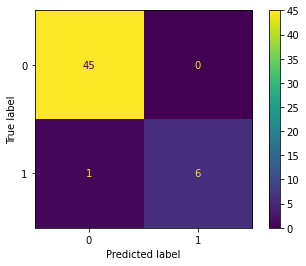

In [35]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
#y_pred = clf.predict(X_test)


#scores = cross_val_score(v, X_train, y_train, cv=10)
accuracy = metrics.accuracy_score(y_test, clf.predict(X_test))
confusion_matrix = metrics.confusion_matrix(y_test,clf.predict(X_test))
#print(confusion_matrix)

print (f"Model Accuracy: \n {round(accuracy *100, 2)}%")
print(confusion_matrix)
plot_confusion_matrix(clf, X_test, y_test)
plt.show()

In [36]:
X_test.head()

,lgas,year,general facility attendance,general outpatient attendance,antenatal attendance total,deliveries-assisted,caesarean section,deliveries complications,deliveries normal,preterm deliveries,...,individuals started on tb treatment ((hiv-ve),registered tb patients screened for hiv,tb patients with hiv receiving art,buruli ulcer patients notified,confirmed dr-tb patients enrolled for treatment,dr-tb suspects tested for dr-tb,suspects screened for tb,tb case successfully treated,tb cases (call forms) notifed,leprosy cases registered
161,7,2014,0.038637,0.025767,0.019931,0.032051,0.008115,0.003521,0.011697,0.0,...,0.0550,0.000000,0.009694,0.0,0.016393,0.021226,0.000970,0.02026,0.000000,0.111111
15,6,2016,0.038637,0.025767,0.019931,0.032051,0.008115,0.003521,0.011697,0.0,...,0.0175,0.089286,0.010440,0.0,0.013661,0.002358,0.108147,0.02026,0.174325,0.000000
73,19,2021,0.038637,0.025767,0.019931,0.032051,0.008115,0.003521,0.011697,0.0,...,0.0550,0.038690,0.009694,0.0,0.016393,0.021226,0.037342,0.02026,0.041575,0.000000
96,16,2015,0.038637,0.025767,0.019931,0.032051,0.008115,0.003521,0.011697,0.0,...,0.0000,0.002976,0.000746,0.0,0.016393,0.021226,0.014549,0.02026,0.000729,0.000000
166,22,2018,0.114611,0.011948,0.026205,0.032051,0.008115,0.003521,0.021137,0.0,...,0.0550,0.038690,0.009694,0.0,0.016393,0.021226,0.037342,0.02026,0.041575,0.000000


In [37]:
#X_test.to_csv("Real_test_data.csv", index=False)

In [38]:
#pd.read_csv("Real_test_data.csv").head()

In [39]:
X_test["lgas"].unique()

array([ 7,  6, 19, 16, 22,  1, 13, 21, 10, 20,  8,  2,  5, 12, 15,  9, 17,
       18, 11, 14,  3,  4])

In [40]:
lga_binary = np.array(X_test["lgas"])

In [41]:
def convert_lga(t):
    predicted_lga = []
    for i in t:
        p=matched_vals[i]
        predicted_lga.append(p)
    return np.array(predicted_lga)

pred_lga = convert_lga(lga_binary)
print(pred_lga)

dict_r = {
    1 : "yes",    0 : "No"
}

['Degema' 'Bonny' 'Opobo Nkoro' 'Ogu Bob' 'Tai' 'Ahoada East' 'Khana'
 'Port Harcourt' 'Bonny' 'Etche ' 'Oyigbo' 'Eleme' 'Ahoada West'
 'Asari Toru ' 'Ikwerre' 'Ikwerre' 'Eleme' 'Ahoada East' 'Obio  Akpor'
 'Emohua' 'Okrika' 'Opobo Nkoro' 'Obio  Akpor' 'Okrika' 'Bonny'
 'Obio  Akpor' 'Degema' 'Ahoada West' 'Omuma' 'Gokana' 'Tai' 'Okrika'
 'ONELGA' 'Khana' 'Khana' 'Akuku Toru' 'Etche ' 'Ahoada West'
 'Ahoada West' 'Gokana' 'Ahoada East' 'Emohua' 'Gokana' 'Opobo Nkoro'
 'Andoni  ' 'Ahoada East' 'Etche ' 'Okrika' 'Bonny' 'Gokana' 'Emohua'
 'Akuku Toru']


In [42]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [43]:
p_array = []
for i in y_pred:
    d = dict_r[i]
    p_array.append(d)
prediction_values = np.array(p_array)
prediction_values

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'yes', 'No', 'No', 'No',
       'No', 'No', 'No', 'yes', 'No', 'No', 'No', 'No', 'No', 'yes', 'No',
       'yes', 'yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'yes', 'No', 'No', 'No'], dtype='<U3')

### X_test Prediction

In [44]:
## Here we can decide to count the number of yes for each local government in order to compare the outcome for the x_data
a= pd.DataFrame(pred_lga, columns=["LGAs"])
b = pd.DataFrame(prediction_values, columns=["Hospital site Prediction"])
df_predict = pd.concat([a,b], axis = 1)
df_predict

,LGAs,Hospital site Prediction
0,Degema,No
1,Bonny,No
2,Opobo Nkoro,No
3,Ogu Bob,No
4,Tai,No
5,Ahoada East,No
6,Khana,No
7,Port Harcourt,yes
8,Bonny,No
9,Etche,No


In [45]:
df_predict["LGAs"].value_counts()

Ahoada West      4
Okrika           4
Gokana           4
Ahoada East      4
Bonny            4
Etche            3
Emohua           3
Opobo Nkoro      3
Khana            3
Obio  Akpor      3
Degema           2
Akuku Toru       2
Ikwerre          2
Eleme            2
Tai              2
Omuma            1
Oyigbo           1
Asari Toru       1
Port Harcourt    1
Andoni           1
Ogu Bob          1
ONELGA           1
Name: LGAs, dtype: int64

In [46]:
dict_values = dict(df_predict)

In [47]:
lgas_array = df_predict["LGAs"].unique()
lgas_array

array(['Degema', 'Bonny', 'Opobo Nkoro', 'Ogu Bob', 'Tai', 'Ahoada East',
       'Khana', 'Port Harcourt', 'Etche ', 'Oyigbo', 'Eleme',
       'Ahoada West', 'Asari Toru ', 'Ikwerre', 'Obio  Akpor', 'Emohua',
       'Okrika', 'Omuma', 'Gokana', 'ONELGA', 'Akuku Toru', 'Andoni  '],
      dtype=object)

In [48]:
# p =[]
# for i in lgas_array:
#     lga_val = df_predict["LGAs"] == i
#     result = df_predict[lga_val]
#     p.append(result)
# print(p)

In [49]:
df_predict.columns

Index(['LGAs', 'Hospital site Prediction'], dtype='object')

### Local government that hospital can be built on Judging from the X_DATA

In [50]:
p_predict = df_predict['Hospital site Prediction'] == 'yes'
df_predict[p_predict]

,LGAs,Hospital site Prediction
7,Port Harcourt,yes
14,Ikwerre,yes
20,Okrika,yes
22,Obio Akpor,yes
23,Okrika,yes
48,Bonny,yes


In [57]:
lga_values = np.array(X_test["lgas"])
lga_values

array([ 7,  6, 19, 16, 22,  1, 13, 21,  6, 10, 20,  8,  2,  5, 12, 12,  8,
        1, 15,  9, 17, 19, 15, 17,  6, 15,  7,  2, 18, 11, 22, 17, 14, 13,
       13,  3, 10,  2,  2, 11,  1,  9, 11, 19,  4,  1, 10, 17,  6, 11,  9,
        3])

### Lga predicted Functions

In [58]:
def convert_lga():
    predicted_lga = []
    for i in lga_values:
        p=matched_vals[i]
        predicted_lga.append(p)
    return np.array(predicted_lga)

pred_lga = convert_lga()
print(pred_lga)

['Degema' 'Bonny' 'Opobo Nkoro' 'Ogu Bob' 'Tai' 'Ahoada East' 'Khana'
 'Port Harcourt' 'Bonny' 'Etche ' 'Oyigbo' 'Eleme' 'Ahoada West'
 'Asari Toru ' 'Ikwerre' 'Ikwerre' 'Eleme' 'Ahoada East' 'Obio  Akpor'
 'Emohua' 'Okrika' 'Opobo Nkoro' 'Obio  Akpor' 'Okrika' 'Bonny'
 'Obio  Akpor' 'Degema' 'Ahoada West' 'Omuma' 'Gokana' 'Tai' 'Okrika'
 'ONELGA' 'Khana' 'Khana' 'Akuku Toru' 'Etche ' 'Ahoada West'
 'Ahoada West' 'Gokana' 'Ahoada East' 'Emohua' 'Gokana' 'Opobo Nkoro'
 'Andoni  ' 'Ahoada East' 'Etche ' 'Okrika' 'Bonny' 'Gokana' 'Emohua'
 'Akuku Toru']


In [59]:
#prediction comparison
a = pd.DataFrame(y_pred, columns=["Prediction"])
b = pd.DataFrame(y_test.values, columns=["Actual_values"])
c = pd.DataFrame(lga_values, columns=["Binary_Lgas"])
z = pd.DataFrame(pred_lga, columns=["Actual_Lgas"])

pred_data_frame = pd.concat([a,b,c, z], axis=1)
pred_data_frame.head()

,Prediction,Actual_values,Binary_Lgas,Actual_Lgas
0,0,0,7,Degema
1,0,0,6,Bonny
2,0,0,19,Opobo Nkoro
3,0,0,16,Ogu Bob
4,0,0,22,Tai


In [60]:
p=pred_data_frame["Prediction"].value_counts()
p

0    46
1     6
Name: Prediction, dtype: int64

In [61]:
array2 = np.array(p)

In [62]:
actl = pred_data_frame["Actual_values"].value_counts()
array3 = np.array(actl)

In [63]:
new_plt = actl.append(p)
array = ["1", "0"]
a = pd.DataFrame(array, columns=["Pred_comp"])
b = pd.DataFrame(array2, columns = ["Actual_values"])
c = pd.DataFrame(array3, columns = ["Prediction"])
new_df = pd.concat([a, b, c], axis=1)
new_df

,Pred_comp,Actual_values,Prediction
0,1,46,45
1,0,6,7


<AxesSubplot:xlabel='Pred_comp'>

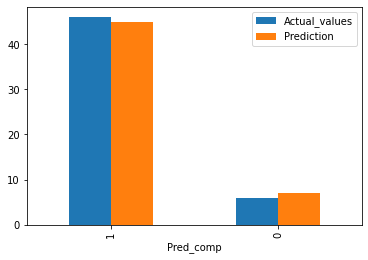

In [64]:
new_df.plot(x="Pred_comp", y=["Actual_values","Prediction"], kind="bar")

In [65]:
#val_file.to_csv("datatrial.csv", index=False)

In [66]:
X_test.columns

Index(['lgas', 'year', 'general facility attendance',
       'general outpatient attendance', 'antenatal attendance total',
       ' deliveries-assisted', ' caesarean section',
       'deliveries complications', 'deliveries normal', ' preterm deliveries',
       ...
       'individuals started on tb treatment ((hiv-ve)',
       'registered tb patients screened for hiv',
       'tb patients with hiv  receiving art', 'buruli ulcer patients notified',
       'confirmed dr-tb patients enrolled for treatment',
       'dr-tb suspects tested for dr-tb', 'suspects screened for tb',
       'tb case successfully treated', 'tb cases (call forms) notifed',
       'leprosy cases registered'],
      dtype='object', length=126)

### Enter imported_file for actual prediction

In [69]:
data = input("enter csv file: ")     ###the selected data input csv file is called "data_trial.csv"
data_trial = pd.read_csv(data)
dict_vals = dict(zip(b_vals, b_valz))
#dict_vals
#data_trial.head()
new_arr = []
for i in data_trial["lgas"].values:
    z = dict_vals[i]
    new_arr.append(z)
new_arr

enter csv file: datatrial.csv


[15]

In [70]:
idx = 0
new_col = new_arr  # can be a list, a Series, an array or a scalar   
#data_trial.insert(loc=idx, column='Lga_bin_value', value=new_col)
new_data_trial = data_trial.drop(["lgas"], axis=1)
data_input_val = new_data_trial.rename(columns={'Lga_bin_value': 'lgas'})

In [71]:
data_input_val.shape

(1, 126)

In [72]:
data_input_val.columns

Index(['year', 'general facility attendance', 'general outpatient attendance',
       'antenatal attendance total', ' deliveries-assisted',
       ' caesarean section', 'deliveries complications', 'deliveries normal',
       ' preterm deliveries', 'pregnacy outcome-birth asphyxia',
       ...
       'registered tb patients screened for hiv',
       'tb patients with hiv  receiving art', 'buruli ulcer patients notified',
       'confirmed dr-tb patients enrolled for treatment',
       'dr-tb suspects tested for dr-tb', 'suspects screened for tb',
       'tb case successfully treated', 'tb cases (call forms) notifed',
       'leprosy cases registered', 'Unnamed: 126'],
      dtype='object', length=126)

In [73]:
#prediction for actual vals

In [74]:
dict_r = {
    1 : "yes",    0 : "No"
}

In [75]:
output = clf.predict(data_input_val)
output

array([1], dtype=int64)

In [76]:
p_array = []
for i in output:
    d = dict_r[i]
    p_array.append(d)
p_array

['yes']

In [77]:
a = data_trial["lgas"]
b = pd.DataFrame(p_array, columns=["predicted_output"])
pd.concat([a,b], axis = 1)

,lgas,predicted_output
0,Obio Akpor,yes
